In [1799]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
from datetime import datetime
from datetime import datetime, timezone

Đọc dữ liệu

In [1800]:
df = pd.read_csv('data_youtube_2.csv', header = 0)


In [1801]:
df['video_publishedAt']  = pd.to_datetime(df['video_publishedAt'])
df['video_publishedAt_mv_official']  = pd.to_datetime(df['video_publishedAt_mv_official'])

In [1802]:
df[df['video_viewCount_mv_official']==47932797.0	]

,index,video_channelId,video_channelTitle,video_channelSubscriber,video_id,video_title,video_publishedAt,video_description,video_thumbnails,video_tags,...,video_viewCount,video_likeCount,video_commentCount,video_duration_teaser,video_id_mv_official,video_title_mv_official,video_publishedAt_mv_official,video_duration_mv_official,video_viewCount_mv_official,total_day_mv_published
142,217,UCEf_Bc-KVd7onSeifS3py9g,SMTOWN,31100000,YLbQkgCfU3s,NCT 2021 엔시티 2021 'Beautiful' MV Teaser,2021-12-12 15:00:17+00:00,"NCT's 3rd album ""Universe"" is out now!\nListen...",https://i.ytimg.com/vi/YLbQkgCfU3s/default.jpg,"['NCT', 'NCT2021', '엔시티', '엔시티2021', 'NCT 127'...",...,1433460.0,347564.0,11127.0,PT31S,nAvjYapdSxk,NCT 2021 엔시티 2021 'Beautiful' MV,2021-12-14 09:00:31+00:00,PT4M43S,47932797.0,333.0


In [1803]:
df = df[(df['total_day_mv_published']>60)]
# df = df[df['video_viewCount_mv_official']>10e5]


Một số hàm cần sử dụng

In [1804]:
# tính len của các gia trị có dạng string trong 1 cột
def len_feature_teaser(df1, column):
    len_features = []
    feature_teaser = list(df1[column])

    for value in feature_teaser :
        if isinstance(value,str):
            len_features.append(len(value))
        else:
            len_features.append(np.nan)
    return len_features

In [1805]:
# chuyển tags dạng string sang list
def convert_tags_to_list(string_tag):
    list_tag= re.sub('\\[|\\]','',string_tag).split(',')
    return list_tag

In [1806]:
# tính len tags
def len_tags_teaser(df1):
    no_tags = []
    list_tags_teaser = list(df1['video_tags'])
    for list_tag in list_tags_teaser:
       
        if isinstance(list_tag,str):
            no_tags.append(len(convert_tags_to_list(list_tag)))
        else:
            no_tags.append(np.nan)
    return no_tags

In [1807]:
# def convert_duration_to_seconds(duration):
#     x = re.findall("\d+", duration)
#     seconds = 0
#     if len(x)== 1 and duration.count('M')==0:
#         seconds = int(x[0])
#     elif len(x)== 1 and duration.count('S')==0:
#         seconds = int(x[0])*60
#     elif len(x)== 2:
#         seconds = int(x[0])*60+int(x[1])
#     return seconds

In [1808]:
# def get_seconds_video(df1, column):
#     total_second = []
#     column_list = list(df1[column])
#     for value in column_list:
#         if isinstance(value,str):
#             total_second.append(convert_duration_to_seconds(value))
#         else:
#             total_second.append(np.nan)
#     return total_second

In [1809]:
def total_hour_mv_teaser_publish(df1):
    list_total_seconds = []
    for i in range(df1.shape[0]):
        time_teaser = df1.iloc[i]['video_publishedAt'].to_pydatetime()
        time_mv = df1.iloc[i]['video_publishedAt_mv_official'].to_pydatetime()
        diff = time_mv -time_teaser
        list_total_seconds.append(diff.total_seconds()//3600)
    return list_total_seconds

outlier

In [1810]:
df_v1 = df.copy()

In [1811]:
df_v1['video_num_tag'] = len_tags_teaser(df_v1)
df_v1['video_title_len'] = len_feature_teaser(df_v1,'video_title')
df_v1['video_description_len'] = len_feature_teaser(df_v1,'video_description')
# df_v1['video_teaser_seconds'] = get_seconds_video(df_v1, 'video_duration_teaser')
# df_v1['video_mv_seconds'] = get_seconds_video(df_v1, 'video_duration_mv_official')
df_v1['total_hour_mv_teaser_publish'] = total_hour_mv_teaser_publish(df_v1)


In [1812]:
num = df_v1.select_dtypes(['int', 'float']).columns
num

Index(['index', 'video_channelSubscriber', 'video_categoryId',
       'video_viewCount', 'video_likeCount', 'video_commentCount',
       'video_viewCount_mv_official', 'total_day_mv_published',
       'video_num_tag', 'video_title_len', 'video_description_len',
       'total_hour_mv_teaser_publish'],
      dtype='object')

In [1813]:
cat = df_v1.select_dtypes('O').columns
cat

Index(['video_channelId', 'video_channelTitle', 'video_id', 'video_title',
       'video_description', 'video_thumbnails', 'video_tags',
       'video_duration_teaser', 'video_id_mv_official',
       'video_title_mv_official', 'video_duration_mv_official'],
      dtype='object')

In [1814]:
num_pre = [
  'video_channelSubscriber',
  # 'video_categoryId',
  'video_viewCount',
  'video_likeCount',
  'video_commentCount',
  'video_num_tag',
  'video_title_len',
  'video_description_len',
 #'video_teaser_seconds',
# 'video_mv_seconds',
  'total_hour_mv_teaser_publish',
  # 'total_day_mv_published',
 'video_viewCount_mv_official',]

In [1815]:
df_num = df_v1[num_pre]

In [1816]:
df_num.describe()

,video_channelSubscriber,video_viewCount,video_likeCount,video_commentCount,video_num_tag,video_title_len,video_description_len,total_hour_mv_teaser_publish,video_viewCount_mv_official
count,5.330000e+02,5.330000e+02,5.310000e+02,5.330000e+02,491.000000,533.000000,532.000000,533.000000,5.330000e+02
mean,3.472598e+07,2.557953e+06,2.526109e+05,1.902945e+04,19.230143,42.454034,567.327068,58.684803,8.425301e+07
std,1.725709e+07,6.992488e+06,6.434896e+05,7.645745e+04,13.963290,12.316176,426.603065,79.127182,2.239043e+08
min,5.450000e+05,2.643400e+04,2.450000e+02,2.300000e+01,2.000000,21.000000,33.000000,-832.000000,5.406700e+04
25%,3.110000e+07,2.504960e+05,2.253900e+04,1.066000e+03,8.000000,34.000000,341.000000,24.000000,2.686511e+06
50%,3.110000e+07,7.718600e+05,6.566200e+04,3.475000e+03,14.000000,40.000000,482.500000,46.000000,1.548642e+07
75%,3.110000e+07,2.034568e+06,2.214130e+05,1.045100e+04,28.000000,49.000000,629.750000,77.000000,6.392926e+07
max,8.290000e+07,7.457201e+07,6.454724e+06,1.120501e+06,75.000000,100.000000,2955.000000,604.000000,1.977485e+09


In [1817]:

df_num= df_num[df_num['total_hour_mv_teaser_publish']>0]
df_num= df_num[df_num['video_viewCount_mv_official']>1]

In [1818]:
df_num.describe()

,video_channelSubscriber,video_viewCount,video_likeCount,video_commentCount,video_num_tag,video_title_len,video_description_len,total_hour_mv_teaser_publish,video_viewCount_mv_official
count,5.300000e+02,5.300000e+02,5.280000e+02,5.300000e+02,488.000000,530.000000,529.000000,530.000000,5.300000e+02
mean,3.474651e+07,2.571986e+06,2.540368e+05,1.913694e+04,19.188525,42.432075,568.606805,62.137736,8.468549e+07
std,1.730379e+07,7.009787e+06,6.450391e+05,7.666053e+04,13.989044,12.336956,427.470157,57.579811,2.244641e+08
min,5.450000e+05,2.643400e+04,2.450000e+02,3.700000e+01,2.000000,21.000000,33.000000,2.000000,5.406700e+04
25%,3.110000e+07,2.550540e+05,2.298125e+04,1.138500e+03,8.000000,34.000000,342.000000,24.000000,2.649806e+06
50%,3.110000e+07,7.802440e+05,6.625500e+04,3.505500e+03,14.000000,40.000000,483.000000,46.000000,1.573475e+07
75%,3.110000e+07,2.039881e+06,2.226230e+05,1.053275e+04,28.000000,49.000000,632.000000,77.750000,6.567364e+07
max,8.290000e+07,7.457201e+07,6.454724e+06,1.120501e+06,75.000000,100.000000,2955.000000,604.000000,1.977485e+09


<AxesSubplot:>

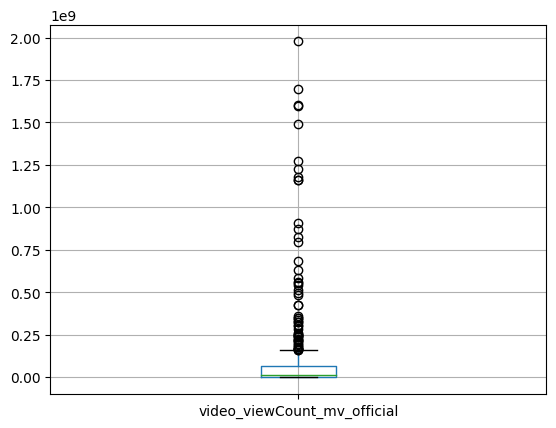

In [1819]:
df_num.boxplot(column='video_viewCount_mv_official')

<AxesSubplot:ylabel='Frequency'>

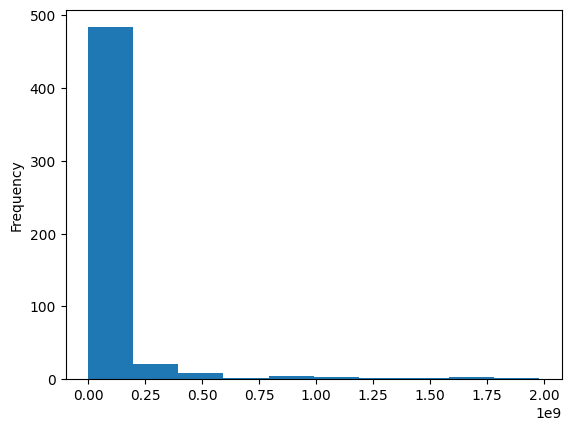

In [1820]:
df_num['video_viewCount_mv_official'].plot.hist()

In [1821]:

# q25,q75 = np.percentile(a = df_num['video_viewCount_mv_official'],q=[25,75])
# IQR = q75 - q25
# lower_limit = q25 - 1.5*IQR
# upper_limit = q75 + 1.5*IQR


# df_num = df_num[(df_num['video_viewCount_mv_official']> lower_limit) &(df_num['video_viewCount_mv_official']<upper_limit)]


<AxesSubplot:>

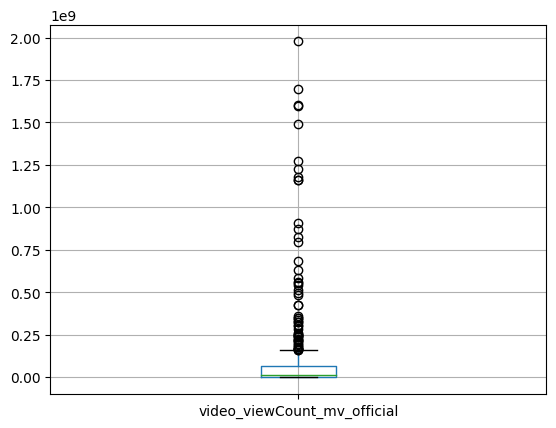

In [1822]:
df_num.boxplot(column='video_viewCount_mv_official')

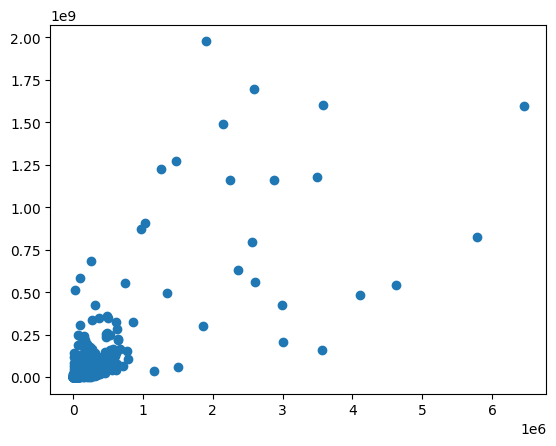

In [1823]:
plt.scatter(df_num['video_likeCount'],df_num['video_viewCount_mv_official'])

missing value

In [1824]:
df_num.isna().sum()

video_channelSubscriber          0
video_viewCount                  0
video_likeCount                  2
video_commentCount               0
video_num_tag                   42
video_title_len                  0
video_description_len            1
total_hour_mv_teaser_publish     0
video_viewCount_mv_official      0
dtype: int64

In [1825]:
df_num['video_num_tag'].fillna(df_num['video_num_tag'].mean(),  inplace=True)
df_num['video_description_len'].fillna(df_num['video_description_len'].mean(),  inplace=True)
df_num['video_likeCount'].fillna(df_num['video_likeCount'].mean(),  inplace=True)
# df_num['video_viewCount_mv_official'].fillna(df_num['video_viewCount_mv_official'].mean(),  inplace=True)

heatmap

<AxesSubplot:>

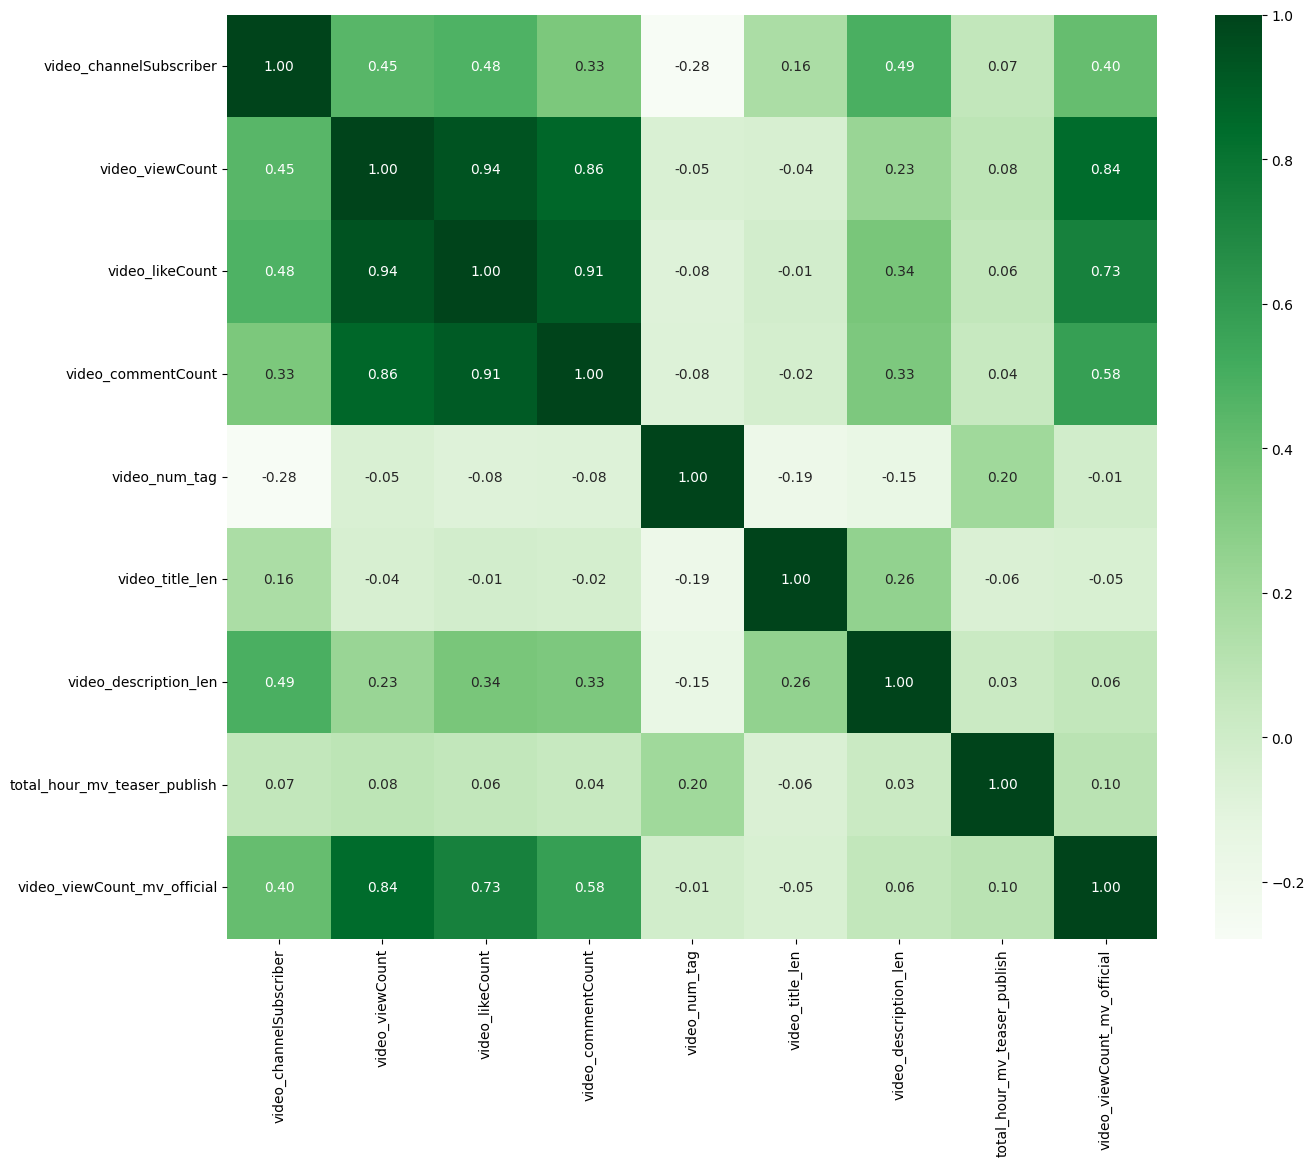

In [1826]:
corr_= df_num.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap="Greens")

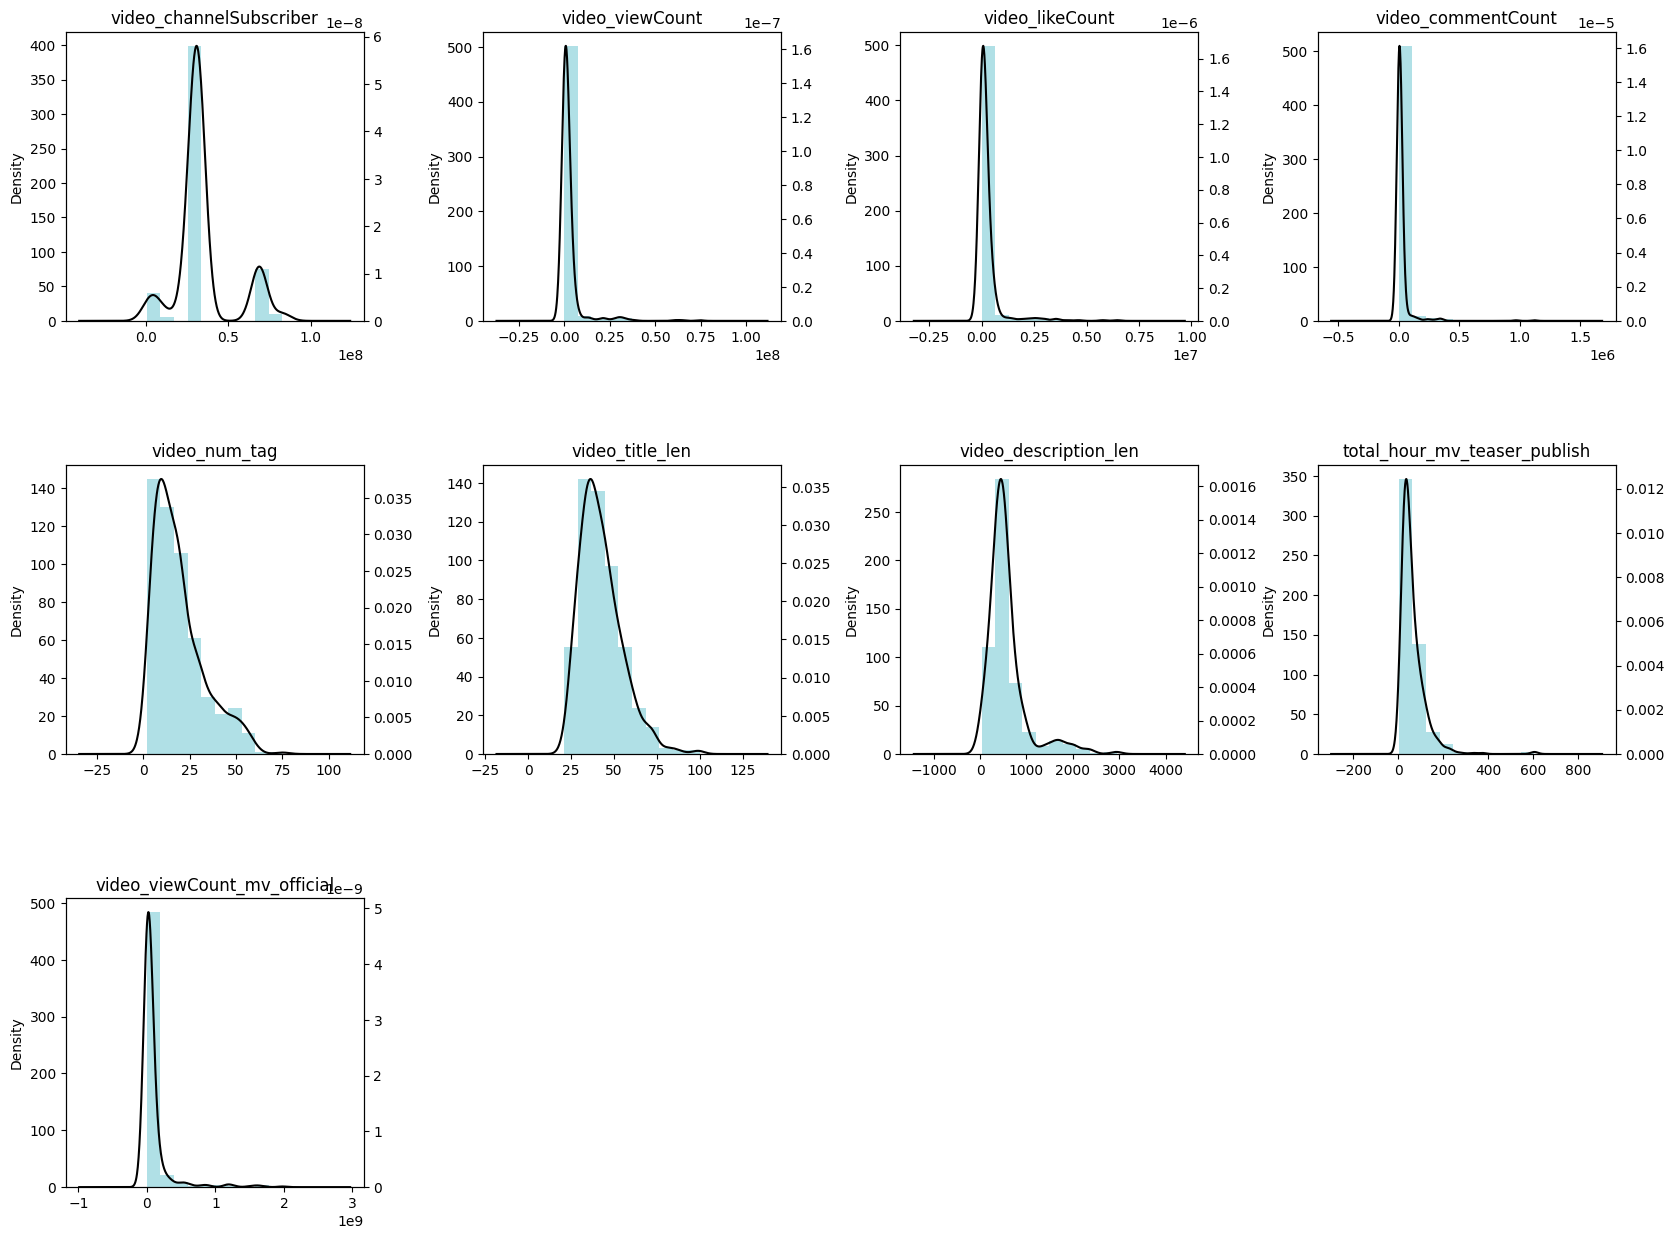

In [1827]:
data_num = df_num[num_pre]
plt.figure(figsize= (20, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.5)
for i, (name, col) in enumerate(data_num.iteritems()):
    plt.subplot(3, 4, i+1)
    col.hist( color='powderblue')
    ax2 = col.plot.kde( secondary_y=True, title=name, color='black')
    ax2.set_ylim(0)

In [1828]:
# for i in num_pre:
#     df_num[i] = np.log(df_num[i])

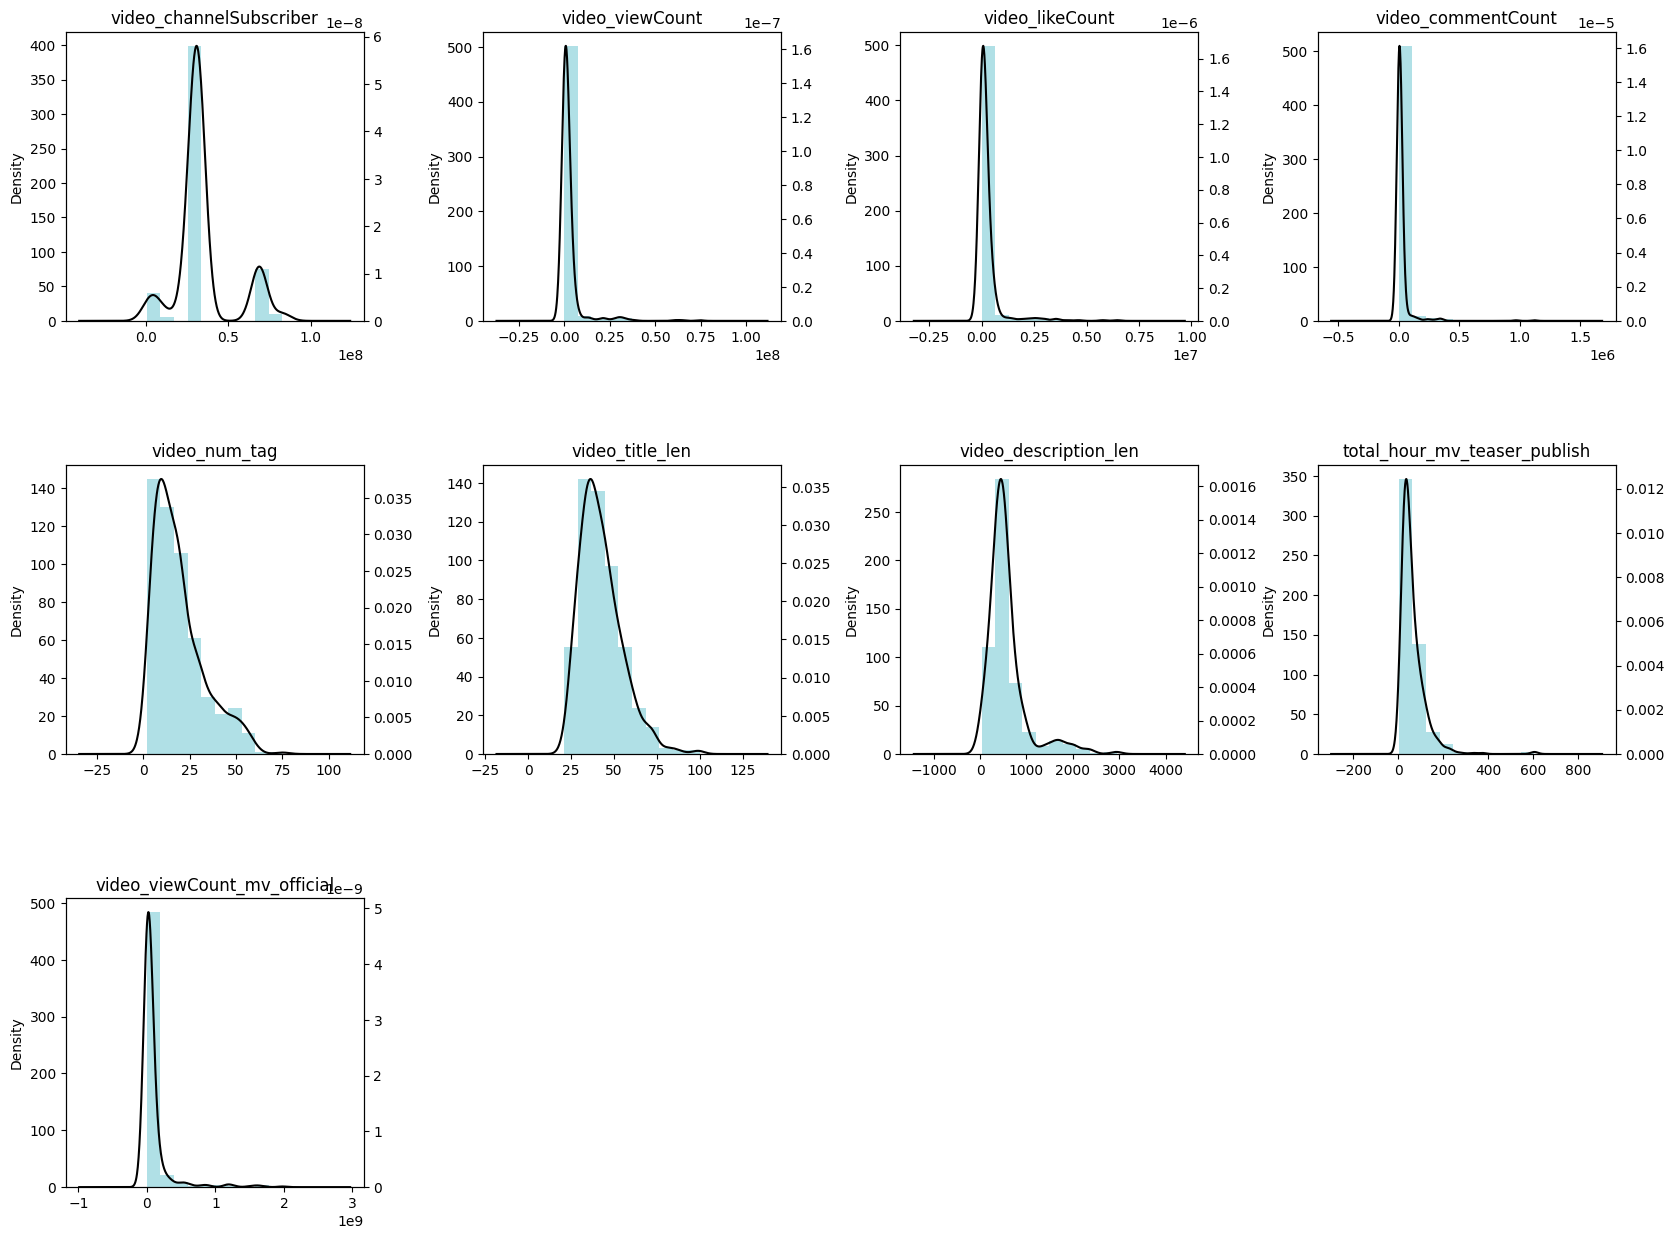

In [1829]:
data_num = df_num[num_pre]
plt.figure(figsize= (20, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.5)
for i, (name, col) in enumerate(data_num.iteritems()):
    plt.subplot(3, 4, i+1)
    col.hist( color='powderblue')
    ax2 = col.plot.kde( secondary_y=True, title=name, color='black')
    ax2.set_ylim(0)

In [1830]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 0 to 550
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   video_channelSubscriber       530 non-null    int64  
 1   video_viewCount               530 non-null    float64
 2   video_likeCount               530 non-null    float64
 3   video_commentCount            530 non-null    float64
 4   video_num_tag                 530 non-null    float64
 5   video_title_len               530 non-null    int64  
 6   video_description_len         530 non-null    float64
 7   total_hour_mv_teaser_publish  530 non-null    float64
 8   video_viewCount_mv_official   530 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 41.4 KB


predict

In [1831]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [1832]:
df_train, df_test = train_test_split(df_num,test_size=0.2, random_state= 43)
X_train = df_train.copy()
y_train = X_train.pop("video_viewCount_mv_official")

X_test = df_test.copy()
y_test = X_test.pop("video_viewCount_mv_official")

In [1833]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [1834]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import numpy as np
Model = []

RMSE = []
R_sq = []
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [1835]:
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
#                               AdaBoostRegressor)

# names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
#          'K Neighbors Regressor', 'Decision Tree Regressor', 
#          'Random Forest Regressor', 'Gradient Boosting Regressor',
#          'Adaboost Regressor']
# models = [LinearRegression(), Ridge(), Lasso(),
#           KNeighborsRegressor(), DecisionTreeRegressor(),
#           RandomForestRegressor(), GradientBoostingRegressor(), 
#           AdaBoostRegressor()]

In [1836]:
# for name, model in zip(names, models):
#     input_scores(name, model, X_train, y_train)

In [1837]:
# evaluation = pd.DataFrame({'Model': Model,
#                            'RMSE': RMSE,
#                            'R Squared': R_sq})
# print("FOLLOWING ARE THE TRAINING SCORES: ")
# evaluation

In [1838]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) 
    print("MSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) 
    print('R2 score: %.2f' % r2_score(ytest, pred)) 

In [1839]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression_train(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytrain, pred) )
    print("MSE: %.2f" % mean_squared_error(ytrain, pred, squared=False)) 
    print('R2 score: %.2f' % r2_score(ytrain, pred)) 

In [1840]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(random_state= 43,max_depth=4, n_estimators= 250)
model1 = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
eval_regression(rf, y_pred, X_train, y_train, X_test, y_test)
# print(r2_score(np.exp(y_test),np.exp(y_pred)))


MAE: 35823622.57
MSE: 81362972.67
R2 score: 0.86


In [1841]:
y_pred_train = rf.predict(X_train)
eval_regression_train(rf, y_pred_train, X_train, y_train, X_test, y_test)
# print(r2_score(np.exp(y_train),np.exp(y_pred_train)))

MAE: 32454734.04
MSE: 68373142.78
R2 score: 0.91


In [1842]:
len(y_pred)

106

In [1843]:
#d1 = {'True Labels': np.exp(y_test), 'Predicted Labels': np.exp(y_pred)}
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
SK['diff'] = abs(SK['True Labels']- SK['Predicted Labels'])
SK[SK['diff']<10000000].reset_index()


,index,True Labels,Predicted Labels,diff
0,433,139083326.0,1.360441e+08,3.039246e+06
1,502,92711684.0,9.408891e+07,1.377221e+06
2,260,1022694.0,4.118753e+06,3.096059e+06
3,304,54067.0,4.080355e+06,4.026288e+06
4,236,1606287.0,8.434373e+06,6.828086e+06
5,270,8504010.0,4.265747e+06,4.238263e+06
6,206,305723.0,4.080355e+06,3.774632e+06
7,388,15273535.0,2.060588e+07,5.332345e+06
8,398,4940624.0,8.359538e+06,3.418914e+06
9,20,3801054.0,1.000144e+07,6.200389e+06


In [1844]:
print('MAE :',SK['diff'].mean())

MAE : 35823622.57137046


In [1845]:
SK[SK['diff']<1000000].reset_index()

,index,True Labels,Predicted Labels,diff
0,306,5274481.0,4.528505e+06,745975.737666
1,12,8827802.0,8.593135e+06,234666.728994
2,286,4322778.0,5.004372e+06,681593.677062
3,249,3679819.0,4.219560e+06,539741.045665
4,63,4208258.0,4.271791e+06,63533.266851
5,142,47932797.0,4.814505e+07,212250.400898
6,264,4948588.0,4.143904e+06,804684.061581


In [1846]:
SK.describe()

,True Labels,Predicted Labels,diff
count,1.060000e+02,1.060000e+02,1.060000e+02
mean,8.203843e+07,8.753848e+07,3.582362e+07
std,2.193841e+08,1.908681e+08,7.339909e+07
min,5.406700e+04,4.080355e+06,6.353327e+04
25%,2.604984e+06,4.528505e+06,3.560225e+06
50%,1.432250e+07,2.794638e+07,1.113532e+07
75%,6.697054e+07,9.293917e+07,4.339617e+07
max,1.595515e+09,1.179944e+09,5.926853e+08


<AxesSubplot:ylabel='Frequency'>

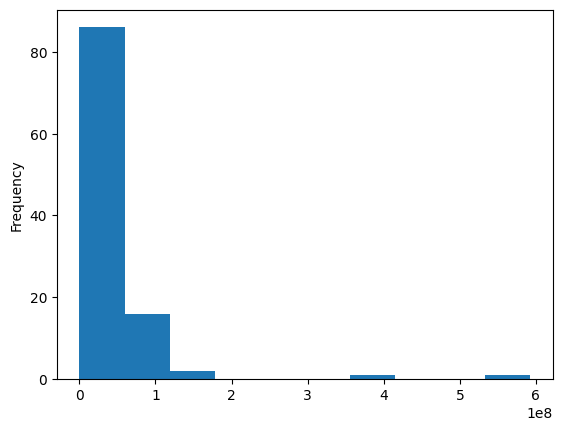

In [1847]:
SK['diff'].plot.hist()

In [1848]:
import pickle
pickle.dump(rf,open('rfrmodel.pkl','wb'))
pickle.dump(scaler,open('scale.pkl','wb'))